In [1]:
%matplotlib inline

In [2]:
from amptools.io.geonet.core import read_geonet
from amptools.stream import streams_to_dataframe
from amptools.table import dataframe_to_xml
import os.path
import glob
import warnings

# API Tutorial
What follows is a brief introduction to the methods found in the amptools API. This code was designed mostly to serve the purposes of the ShakeMap http://usgs.github.io/shakemap/ software, but the reader functions for the various strong motion data formats might be used in a broader context. 

Each io package (amptools.io.FORMAT) has a module called core.py, in which are implemented two methods: is_FORMAT and read_FORMAT. These functions all behave the same, so we'll use the geonet format as an example, since the data are readily available on the GNS FTP site (<ftp://ftp.geonet.org.nz/strong/processed/Proc/>).

In [3]:
datafile = os.path.join(os.getcwd(),'..','tests','data','geonet','20161113_110259_WTMC_20.V1A')
stream = read_geonet(datafile)

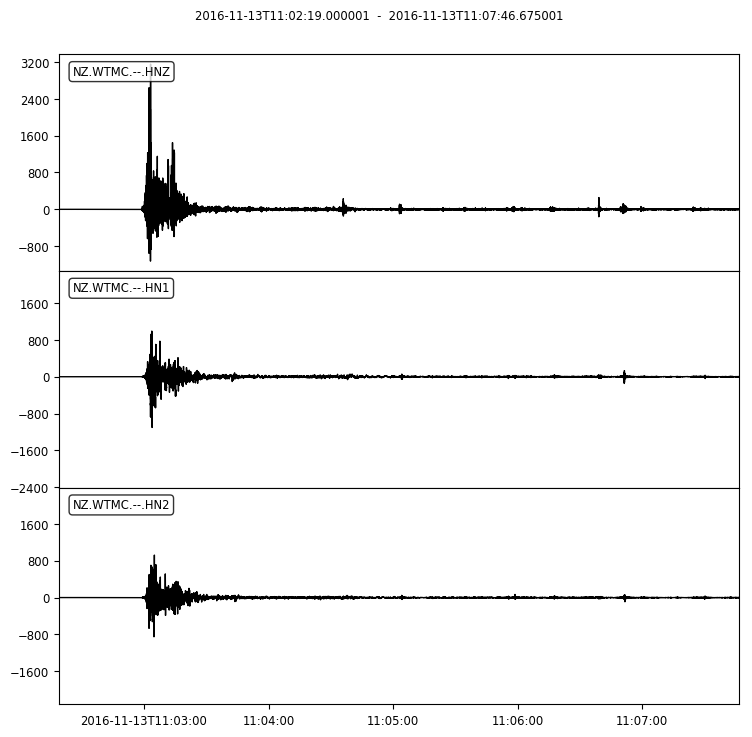

In [4]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore") #matplotlib warning is distracting
    stream.plot()

Each read_FORMAT function takes in a file name, and returns an ObsPy Stream (<https://docs.obspy.org/packages/autogen/obspy.core.stream.Stream.html>) object.  A Stream object can contain many Trace objects (<https://docs.obspy.org/packages/autogen/obspy.core.trace.Trace.html>).  Our Stream objects generally contain three Traces, one for each channel.  The channels will be named either 'H1'/'H2'/'HZ' or 'HHE'/'HHN'/'HHZ'. The Trace objects are accessed by accessing the elements of the Stream object, like so:

In [5]:
HHZ = stream[0]
HHN = stream[1]
HHE = stream[2]

Trace and Stream objects have a number of useful methods, like plot() above. See the links above for the full list.

Finally, a method that may be of general interest is *streams_to_dataframe()*, which takes a sequence of Stream objects and turns them into a pandas DataFrame object.

In [6]:
streams = []
datafiles = glob.glob(os.path.join(os.getcwd(),'..','tests','data','geonet','*.V1A'))
for dfile in datafiles:
    stream = read_geonet(dfile)
    streams.append(stream)

In [7]:
dataframe, spectral_streams = streams_to_dataframe(streams)

Below we'll display a subset of the columns.  All acceleration values are in %g, and pgv is in cm/s.

In [14]:
dataframe

STATION                             NAME  \
                                             
0    WTMC               Te_Mara_Farm_Waiau   
1    HSES  Hanmer_Springs_Emergency_Centre   
2     THZ                        Top_House   

                                              SOURCE NETID        LAT  \
                                                                        
0  New Zealand Institute of Geological and Nuclea...    NZ -41.380556   
1  New Zealand Institute of Geological and Nuclea...    NZ -41.476667   
2  New Zealand Institute of Geological and Nuclea...    NZ -40.237500   

          LON        HN2                                      ...      \
                     PGA        PGV     SA(0.3)    SA(1.0)    ...       
0  173.053611  94.077102  75.735943  315.634293  84.085779    ...       
1  172.830556  26.355945  31.568481   91.769514  41.694570    ...       
2  172.905278   4.087736  12.155122   10.763898   8.041374    ...       

          HNZ                                                     HN1  \
          PGA        PGV    SA(0.3)    SA(1.0)    SA(3.0)         PGA   
0  321.671463  47.096497  89.204459  28.190291  18.621492  112.389945   
1   16.212185  13.617498  47.233376  12.717638   3.434374   24.420751   
2    2.539712   8.044496   6.153212   5.120635   2.369470    4.940955   

                                                  
          PGV     SA(0.3)     SA(1.0)    SA(3.0)  
0  110.152569  323.354587  134.585089  17.193322  
1   31.592516   58.878911   41.970935   8.563596  
2   12.343086    9.244183    8.385417   3.318962  

[3 rows x 21 columns]

In [15]:
dataframe[['STATION','NETID','LAT','LON','HN1']]

STATION NETID        LAT         LON         HN1                          \
                                               PGA         PGV     SA(0.3)   
0    WTMC    NZ -41.380556  173.053611  112.389945  110.152569  323.354587   
1    HSES    NZ -41.476667  172.830556   24.420751   31.592516   58.878911   
2     THZ    NZ -40.237500  172.905278    4.940955   12.343086    9.244183   

                          
      SA(1.0)    SA(3.0)  
0  134.585089  17.193322  
1   41.970935   8.563596  
2    8.385417   3.318962